<h1 align="center"> IST 5520 Project: Milestone 3 </h1>
<h3 align="center"> G5: Zack Brown, Rachel Fluegel, Xiaojing Ge, and Jing Sun </h3>

# 1. Introduction

### Busness Problem/Scenario

#### What is KickStarter?

Have you ever had an idea about creating something that improves on what something else already does, or even does something that has never been done before?  Lots of people do, but until recently, very few had the resources to make their visions into reality.  But the Internet, as it has evolved, has changed that.  Now, creators of all stripes — from musicians to graphic artists to designers to engineers — can get the funding that they need to bring their concepts to life.  And it comes from everyday people around the world, just like you.  One of the most popular places where this all happens is on the website Kickstarter.

Kickstarter is an online fundraising platform.  Creators post their projects, providing specifications for their finished product, potential risks and challenges, and progress updates.  Then, other people can donate money towards projects, usually earning a reward if the project meets its fundraising goal. As the website (https://techboomers.com) describes:

"Kickstarter is often referred to as a "crowdfunding" platform, and you may see us refer to it (and other services like it) as such.  Basically, "crowdfunding" is a business model where creators of a project or business solicit donations from a large number of people at once, thereby reducing the amount of money that each donor has to pay.  The worldwide and interconnected nature of the Internet makes this model easy to implement through websites like Kickstarter."
Kickstarter projects are spread across 15 diverse categories.  They may compose music, create gadgets, write books or comic books, or design the newest trendy fashions!

For backers that support a kickstarter project, they will get an inside look at the creative process, and help that project come to life. They also get to choose from a variety of unique rewards offered by the project creator. Rewards vary from project to project, but often include a copy of what is being produced (CD, DVD, book, etc.) or an experience unique to the project. However, there is no guarantee that people who post projects on Kickstarter will deliver on their projects, use the money to implement their projects, or that the completed projects will meet backers' expectations. Therefore, backers need to use their own judgment on supporting a project. This is also the reason we choose to investigate the patterns of selection dataset by using some business analytics methods.
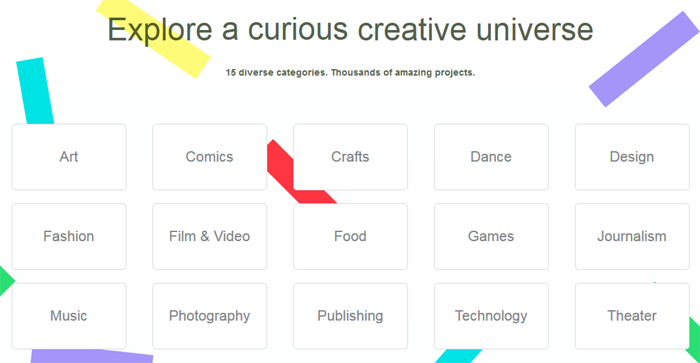

#### Business Scenario

Based on the dataset we found online (https://www.kaggle.com/toshimelonhead/400000-kickstarter-projects), in this project we want to conduct an exploratory study on the Kickstarter projects collected on the Kaggle website. Specifically, we want to answer the following research questions:

 - How can we build a predictive model to estimate how likely a project will be successful?
 - What is the percentage of each business group that was successful?
 - What variables are consistent through the successful/failed business category projects?
 - How much does each variable affect the end result of each business category?
 - Who can be benefit from the project?
 - Why would this analysis be important?




# 2. Data Source and Collection

### Data Source and Key Infomation

We first decided to import pandas so we can import the csv file and be able to clean and analyze the data later on in the project. 

In [1]:
import pandas as pd

Using Pandas, we can read the csv fle from the location its was saved after downloading it.

In [2]:
kickstarter = pd.read_csv("kickstarter.csv",
                         header = 0)

The C:\\... is where one person in our group saved the csv file to be able to import into Python. It will be different for everyone since we all will have it saved ina different place.

Let's show all the information that we downloaded in to the data frame.

In [3]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430938 entries, 0 to 430937
Data columns (total 30 columns):
Unnamed: 0                   430938 non-null int64
id                           430938 non-null int64
backers_count                430938 non-null int64
blurb                        430938 non-null object
currency                     430938 non-null object
goal                         430938 non-null float64
launched_at                  430938 non-null object
deadline                     430938 non-null object
location.country             429843 non-null object
name                         430934 non-null object
usd_pledged                  430938 non-null float64
slug                         430938 non-null object
spotlight                    430938 non-null bool
staff_pick                   430938 non-null bool
static_usd_rate              430938 non-null float64
state                        430938 non-null object
year                         430938 non-null int64
month     

As shown above, there are 430,938 observations and 30 variables in this Kickstarter data. 

Using the head() and transpose(), we can look at the first three rows of data to get a quick look at all the information in the data frame.

In [4]:
kickstarter.head(3).transpose()

,0,1,2
Unnamed: 0,0,1,2
id,857125548,1038659700,1238331911
backers_count,1,2,0
blurb,Exploring paint and its place in a digital world.,Mike Fassio wants a side-by-side photo of me a...,I need your help to get a nice graphics tablet...
currency,USD,USD,USD
goal,2000,10,900
launched_at,2015-03-19 22:34:57,2014-07-17 01:55:07,2014-07-30 16:29:13
deadline,2015-04-30 23:12:00,2014-07-27 01:55:07,2014-08-29 16:29:13
location.country,US,US,US
name,Remix,Photo of Grant and Hazel eating cake with bare...,Minecraft Digital Art/Animations


When looking at the three rows above can see all the information that has been entered, but we were wondering which variables mighthave missing values. To do this, we are going to use the apply() to see how many times Null is entered in each variable.

In [5]:
kickstarter.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0                      0
id                              0
backers_count                   0
blurb                           0
currency                        0
goal                            0
launched_at                     0
deadline                        0
location.country             1095
name                            4
usd_pledged                     0
slug                            0
spotlight                       0
staff_pick                      0
static_usd_rate                 0
state                           0
year                            0
month                           0
day                             0
hour                            0
days_to_deadline                0
goal_USD                        0
category_name                   0
category_slug                   0
blurb_length                    0
location_type                   0
location_country                0
location_state                  0
location_displayable_name       0
binary_state  

Above, we can see that name has Null 4 times and location.country has Null entered 1,095 times. Since there is only about ((1,095+4) / 430,938) .26% of observations with missing values, we can decided if we want to take them out during the cleaning phase. If we do decided to remove missiing values, the data frame would then no longer have any missing values to take into consideration. This could be an option for us since we would be taking out such a small amount of the data.  

### Meaning of Each Variable

- **id**: id of the kickstarter
- **backers_count**: number of backers
- **blurb**: product descriptions
- **currency**: currency used for project
- **goal**: goal amount in current currency
- **launched_at**: launch date of project
- **deadline**: project deadline
- **location.country**: location of origination
- **name**: name of project
- **usd_pledged**: amount pledged converted into USD dollars
- **slug**: project subcategory
- **spotlight**: whether or not this is a spotlight project (used for projects that have raised their funding goal)
- **staff_pick**: whether Kickstarter designates project as a staff pick
- **static-usd-rate**: currency
- **state**: location state, province, etc.
- **year**: year of launch
- **month**: month of launch
- **day**: day of launch
- **hour**: hour of launch
- **days_to_deadline**: number of days until project deadline
- **goal_USD**: goal amount in USD
- **category_name**: category of Kickstarter
- **category_slug**: subcaetegory of the catergy of Kickstarter
- **blurb_length**: length of the blurb
- **location_type**: type of location that the Kickstarter originated
- **location_country**: location of the country
- **location_state**: location of the state
- **location_displayale_name**: universal display name of the city and state
- **binary_state**: true or false state of the Kickstarter


Some of the most usedful vaiables at first glace are going to be category_name, usd_pledged, goal, spotlight, and days_to_deadline.

Showing the summary statistics of the data frame to get a better understanding of the columns that are numeric

In [6]:
kickstarter.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,430938.0,2.037576e+03,1.184189e+03,0.000000,1009.0,2.026000e+03,3.065000e+03,4.095000e+03
id,430938.0,1.073657e+09,6.194721e+08,8624.000000,536561503.0,1.074770e+09,1.609176e+09,2.147476e+09
backers_count,430938.0,1.389502e+02,1.035447e+03,0.000000,2.0,1.700000e+01,7.100000e+01,2.193820e+05
goal,430938.0,4.883624e+04,1.103247e+06,0.010000,2000.0,5.000000e+03,1.600000e+04,1.000000e+08
usd_pledged,430938.0,1.210324e+04,1.047045e+05,0.000000,55.0,9.220000e+02,5.146987e+03,2.033899e+07
static_usd_rate,430938.0,1.007943e+00,2.286021e-01,0.008771,1.0,1.000000e+00,1.000000e+00,1.716408e+00
year,430938.0,2.015554e+03,2.184330e+00,2009.000000,2014.0,2.016000e+03,2.017000e+03,2.019000e+03
month,430938.0,6.192097e+00,3.371953e+00,1.000000,3.0,6.000000e+00,9.000000e+00,1.200000e+01
day,430938.0,1.507828e+01,8.851132e+00,1.000000,7.0,1.500000e+01,2.300000e+01,3.100000e+01
hour,430938.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00


### High Level Requirments

Some of the hig level requirments that we will have to do later on in the project include cleaning the data, transforming the data, splitting the data into their category_names and looking at different variables, and regression and predictive analysis. Cleaning and transforming the data will help us make the data easier to work with and read as we split it up and look at key variables. Splitting up the data into different categories will allow us to do regression and predictive analysis on the different categories. This will always us to make specific analysis on the categories instead of the overall data. The specific information will be helpful to new users of Kickstarter and anyone else, state holders, trying to become sucessful in starting up their own project.

# 3. Data Exploration
## 3.1. Data Clean

In [7]:
kickstarter = kickstarter.drop(['location.country', 'name'], axis = 1)
kickstarter.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,857125548,1038659700,1238331911,189217262,1260075071
backers_count,1,2,0,0,1
blurb,Exploring paint and its place in a digital world.,Mike Fassio wants a side-by-side photo of me a...,I need your help to get a nice graphics tablet...,I want to create a Nature Photograph Series of...,I want to bring colour to the world in my own ...
currency,USD,USD,USD,USD,GBP
goal,2000,10,900,900,15000
launched_at,2015-03-19 22:34:57,2014-07-17 01:55:07,2014-07-30 16:29:13,2015-05-11 16:09:11,2015-02-06 21:52:02
deadline,2015-04-30 23:12:00,2014-07-27 01:55:07,2014-08-29 16:29:13,2015-05-31 16:09:11,2015-03-08 20:52:02
usd_pledged,25,6,0,0,1.52011
slug,remix,photo-of-grant-and-hazel-eating-cake-with-bare...,minecraft-digital-art-animations,nature-photograph-project,north-africa-art-project-my-dream


In the first part, we can see that name has Null 4 times and location.country has Null entered 1,095 times. Since there is only about ((1,095+4) / 430,938) .26% of observations with missing values, we decided to take them out, the dataframe then no longer have any missing values to take into consideration. 

In [8]:
kickstarter['spotlight'].describe()

count     430938
unique         2
top        False
freq      285279
Name: spotlight, dtype: object

In [9]:
#kickstarter.spotlight = kickstarter['spotlight'].astype(int)
kickstarter['spotlight'] = kickstarter['spotlight'].replace(to_replace=[True,False],value=[1,0])

In [10]:
#kickstarter.staff_pick = kickstarter['staff_pick'].astype(int)
kickstarter['staff_pick'] = kickstarter['staff_pick'].replace(to_replace=[True,False],value=[1,0])

Convert 'True', 'False' values in datafram as 1 for True and 0 for False

In [11]:
kickstarter['launched_at'] = pd.to_datetime(kickstarter['launched_at'])
kickstarter['deadline'] = pd.to_datetime(kickstarter['deadline'])

Making the columns with date and time into a datetime

In [12]:
kickstarter['binary_state'].str.get_dummies()

,failed,successful
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
430933,0,1
430934,0,1
430935,1,0
430936,1,0


In [13]:
kickstarter['state'].str.get_dummies()

,canceled,failed,live,successful,suspended
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
430933,0,0,1,0,0
430934,0,0,1,0,0
430935,0,0,1,0,0
430936,0,0,1,0,0


By looking at the table above, we can see that there are some dumplication between state and binary_state variable. Therefore, we can drop binary_state column. The final dataframe should look like this:

In [14]:
new_kickstarter = pd.concat([kickstarter, pd.get_dummies(kickstarter['state'])], axis=1)
new_kickstarter = new_kickstarter.drop(['binary_state','state'], axis=1)
new_kickstarter.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,857125548,1038659700,1238331911,189217262,1260075071
backers_count,1,2,0,0,1
blurb,Exploring paint and its place in a digital world.,Mike Fassio wants a side-by-side photo of me a...,I need your help to get a nice graphics tablet...,I want to create a Nature Photograph Series of...,I want to bring colour to the world in my own ...
currency,USD,USD,USD,USD,GBP
goal,2000,10,900,900,15000
launched_at,2015-03-19 22:34:57,2014-07-17 01:55:07,2014-07-30 16:29:13,2015-05-11 16:09:11,2015-02-06 21:52:02
deadline,2015-04-30 23:12:00,2014-07-27 01:55:07,2014-08-29 16:29:13,2015-05-31 16:09:11,2015-03-08 20:52:02
usd_pledged,25,6,0,0,1.52011
slug,remix,photo-of-grant-and-hazel-eating-cake-with-bare...,minecraft-digital-art-animations,nature-photograph-project,north-africa-art-project-my-dream


Some useful information from that summary statistics above has to do with days_to_deadline, usd_pledged, and goal. All three of these will be useful so we can see the mean, max, and min of the goals from all the observations and be able to make analysis and predictions from these numbers for new people using Kickstarter can see and understand so, they can also be sucessful. 

## 3.2. Data Summarize and Visualization

In [15]:
# Use matplotlib to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

#Show plot in jupyter notebook
%matplotlib inline

### Showing Total Failure and Success

In [16]:
print(kickstarter['binary_state'].value_counts())

failed        257217
successful    173721
Name: binary_state, dtype: int64


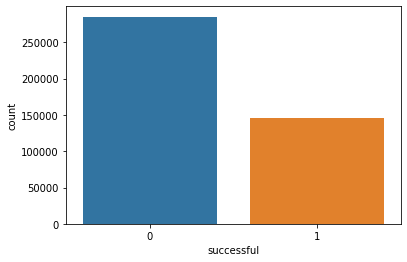

In [17]:
sns.countplot(x="successful", data=new_kickstarter)

We can see that more projects are unsuccessful than are successful, by a fair amount.

#### Number of Every Category

In [18]:
new_kickstarter.category_name.value_counts()

Product Design    24627
Tabletop Games    21082
Video Games       13770
Apparel           12534
Apps              11255
                  ...  
Quilts              125
Letterpress         123
Residencies         122
Chiptune             60
Taxidermy            16
Name: category_name, Length: 159, dtype: int64

Here we're listing out all 159 categories from our dataset, and counting how many projects belong to each category

In [19]:
category_success=pd.crosstab(index=new_kickstarter['category_name'],columns="count")
print(category_success.to_string())

col_0               count
category_name            
3D Printing          1191
Academic             1666
Accessories          8079
Action               1263
Animals               397
Animation            3753
Anthologies          1836
Apparel             12534
Apps                11255
Architecture         1297
Art                  4151
Art Books            4316
Audio                 727
Bacon                 269
Blues                 484
Calendars             612
Camera Equipment      858
Candles               772
Ceramics              555
Children's Books     9383
Childrenswear         887
Chiptune               60
Civic Design          489
Classical Music      3529
Comedy               4370
Comic Books          6425
Comics               2916
Community Gardens     431
Conceptual Art       1448
Cookbooks             947
Country & Folk       5947
Couture               460
Crafts               2297
Crochet               268
DIY                  2016
DIY Electronics      1704
Dance       

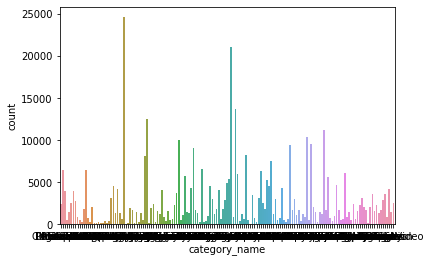

In [20]:
sns.countplot(x="category_name", data=new_kickstarter)
plt.show()

What we see here is a visualization of the number of Kickstarter projects across all categories. There are a lot of broad categories, and a lot of very specific categories. In order to narrow down our results, we'll pull results from the top 15 categories on Kickstarter.

#### Choosing the Top 15 Categories and Finding Success Percentage

In [21]:
top_categories = category_success.nlargest(15, ['count'])

Choosing only the top 15 categories

In [22]:
#set count values to o
PD_success = 0
TG_success = 0
VG_success = 0
AP_success = 0
APS_success = 0
F_success = 0
D_success = 0
NF_success = 0
S_success = 0
CB_success = 0
W_success = 0
R_success = 0
WS_success = 0
AC_success = 0
IR_success = 0

#finding the successful cases for each of the top 15 category_names
for i in new_kickstarter.index:
    if new_kickstarter.loc[i,'category_name'] == "Product Design" :
        if new_kickstarter.loc[i, 'successful'] == 1:
            PD_success = PD_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Tabletop Games':
        if new_kickstarter.loc[i, 'successful'] == 1:
            TG_success = TG_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Video Games':
        if new_kickstarter.loc[i, 'successful'] == 1:
            VG_success = VG_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Apparel':
        if new_kickstarter.loc[i, 'successful'] == 1:
            AP_success = AP_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Apps':
        if new_kickstarter.loc[i, 'successful'] == 1:
            APS_success = APS_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Fiction':
        if new_kickstarter.loc[i, 'successful'] == 1:
            F_success = F_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Documentary':
        if new_kickstarter.loc[i, 'successful'] == 1:
            D_success = D_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Nonfiction':
        if new_kickstarter.loc[i, 'successful'] == 1:
            NF_success = NF_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Shorts':
        if new_kickstarter.loc[i, 'successful'] == 1:
            S_success = S_success + 1
    elif new_kickstarter.loc[i,'category_name'] == "Children's Books":
        if new_kickstarter.loc[i, 'successful'] == 1:
            CB_success = CB_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Web':
        if new_kickstarter.loc[i, 'successful'] == 1:
            W_success = W_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Rock':
        if new_kickstarter.loc[i, 'successful'] == 1:
            R_success = R_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Webseries':
        if new_kickstarter.loc[i, 'successful'] == 1:
            WS_success = WS_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Accessories':
        if new_kickstarter.loc[i, 'successful'] == 1:
            AC_success = AC_success + 1
    elif new_kickstarter.loc[i,'category_name'] == 'Indie Rock':
        if new_kickstarter.loc[i, 'successful'] == 1:
            IR_success = IR_success + 1

In [23]:
success_values = pd.DataFrame([PD_success, TG_success, VG_success, AP_success, 
                                APS_success, F_success, D_success, NF_success, 
                                S_success, CB_success, W_success, R_success, 
                                WS_success, AC_success, IR_success], columns=['success_count'])

In [24]:
#getting everything into one data frame
top = pd.DataFrame(top_categories)
success = pd.DataFrame(success_values['success_count'])
top.reset_index(drop=True, inplace=True)
success.reset_index(drop=True, inplace=True)
top_success = pd.concat([top, success], axis=1)
names = ["Product Design", "Tabletop Games", 'Video Games', 'Apparel', 'Apps', 'Fiction', 'Documentary', 'Nonfiction', 'Shorts', "Children's Books", 'Web','Rock', 'Webseries', 'Accessories', 'Indie Rock']
top_success['category'] = names
print(top_success)

    count  success_count          category
0   24627          10417    Product Design
1   21082          11187    Tabletop Games
2   13770           2991       Video Games
3   12534           1885           Apparel
4   11255            465              Apps
5   10383           2576           Fiction
6   10045           6457       Documentary
7    9510           2587        Nonfiction
8    9383           7283            Shorts
9    9097           2950  Children's Books
10   8213            536               Web
11   8079           3756              Rock
12   7489           1825         Webseries
13   6610           2049       Accessories
14   6474           3839        Indie Rock


Here we count up the number of successful projects from each of our top 15 categories and put them into a data frame

In [25]:
#reordering top_success
reorder = top_success.columns.tolist()
reorder = reorder[-1:]  + reorder[:-1]
top_success = top_success[reorder]
print(top_success)

            category  count  success_count
0     Product Design  24627          10417
1     Tabletop Games  21082          11187
2        Video Games  13770           2991
3            Apparel  12534           1885
4               Apps  11255            465
5            Fiction  10383           2576
6        Documentary  10045           6457
7         Nonfiction   9510           2587
8             Shorts   9383           7283
9   Children's Books   9097           2950
10               Web   8213            536
11              Rock   8079           3756
12         Webseries   7489           1825
13       Accessories   6610           2049
14        Indie Rock   6474           3839


We then order our list by the number of projects from each category, followed by the number of successful projects.

In [26]:
#finding the percent of success
top_success['percent'] = top_success['success_count']/top_success['count']
print(top_success)

            category  count  success_count   percent
0     Product Design  24627          10417  0.422991
1     Tabletop Games  21082          11187  0.530642
2        Video Games  13770           2991  0.217211
3            Apparel  12534           1885  0.150391
4               Apps  11255            465  0.041315
5            Fiction  10383           2576  0.248098
6        Documentary  10045           6457  0.642807
7         Nonfiction   9510           2587  0.272029
8             Shorts   9383           7283  0.776191
9   Children's Books   9097           2950  0.324283
10               Web   8213            536  0.065262
11              Rock   8079           3756  0.464909
12         Webseries   7489           1825  0.243691
13       Accessories   6610           2049  0.309985
14        Indie Rock   6474           3839  0.592987


Then we added the percentage of successful projects.

In [27]:
top_success.set_index('category')

,count,success_count,percent
category,,,
Product Design,24627,10417,0.422991
Tabletop Games,21082,11187,0.530642
Video Games,13770,2991,0.217211
Apparel,12534,1885,0.150391
Apps,11255,465,0.041315
Fiction,10383,2576,0.248098
Documentary,10045,6457,0.642807
Nonfiction,9510,2587,0.272029
Shorts,9383,7283,0.776191


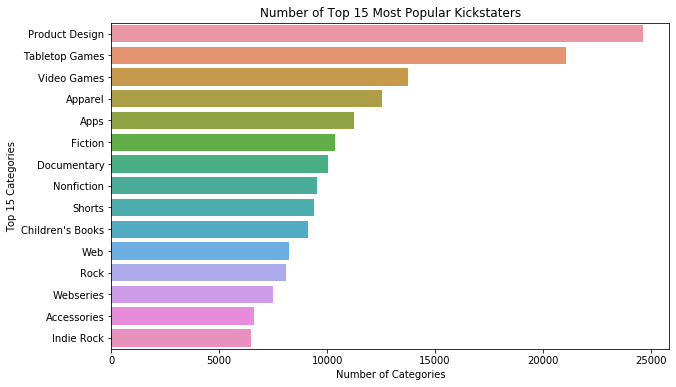

In [28]:
#creating a graph of top_success
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y='category', x='count', data=top_success)
ax.set_title("Number of Top 15 Most Popular Kickstaters")
ax.set_ylabel("Top 15 Categories")
ax.set_xlabel("Number of Categories")
plt.show()

These are the top 15 most popular Kickstarter categories. Looking at this graph, we see Product Design is by far the most popular category, with the second most popular category, Tabletop Games, lagging behind a good amount. After Video Games, the remaining categories are a bit closer to each other than the top 3.

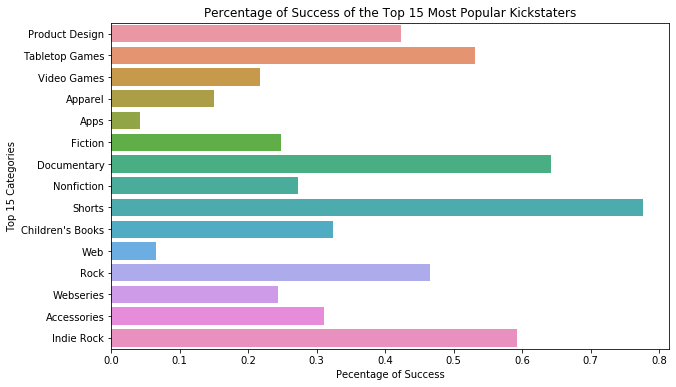

In [29]:
#creating a graph of top_success
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y='category', x='percent', data=top_success)
ax.set_title("Percentage of Success of the Top 15 Most Popular Kickstaters")
ax.set_ylabel("Top 15 Categories")
ax.set_xlabel("Pecentage of Success")
plt.show()

This graph gives a new perspective on the top 15 categories. We see that the most successful of these categories is Shorts, despite only being the 9th most popular category. Conversely, Apps, a much more popular category, is the least successful of these categories.

### Looking at Variables and Their Impact on Success

##### Staff_Pick Effect on Successful Kickstarters

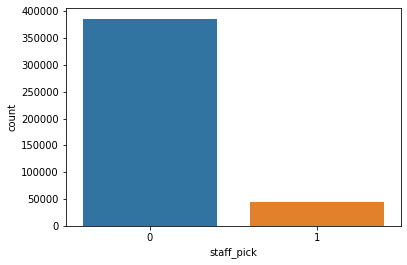

In [30]:
staff_pick = new_kickstarter[['staff_pick', 'successful']].copy()

sns.countplot(x="staff_pick", data=new_kickstarter)
plt.show()

In the scheme of things, we see that very few projects were ever selected as a Staff Pick, which makes sense, given the number of projects available on the site.

In [31]:
#Number of times a kickstarter was successful if it was staff_picked (1) or not (0)
num = pd.crosstab(new_kickstarter.staff_pick, columns='count')
num

col_0,count
staff_pick,
0,385800
1,45138


While we can see that there are very few projects that become Staff Picks, we want to see if becoming a Staff Pick can still impact the success of a project.

In [32]:
not_picked_successful = 0
picked_successful = 0

for i in new_kickstarter.index:
    if new_kickstarter.loc[i,'staff_pick'] == 1 :
        if new_kickstarter.loc[i, 'successful'] == 1:
            picked_successful = picked_successful + 1
    else:
        if new_kickstarter.loc[i, 'successful'] == 1:
            not_picked_successful = not_picked_successful + 1

In [33]:
staff_pick = pd.DataFrame([not_picked_successful, picked_successful])
picked = pd.DataFrame(['0.0 (False)', '1.0 (True)'])
staff = pd.concat([picked, num, staff_pick], axis=1)
staff.columns = [ 'staff_pick','total_count', 'success_count']
staff.index = [0,1]
staff['percent'] = staff['success_count']/staff['total_count']
staff

,staff_pick,total_count,success_count,percent
0,0.0 (False),385800,116465,0.301879
1,1.0 (True),45138,29194,0.646772


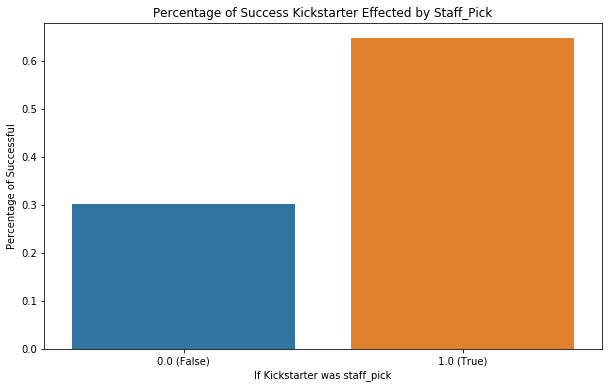

In [34]:
#creating a graph of staff_pick Success
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='staff_pick', y = 'percent', data=staff)
ax.set_title("Percentage of Success Kickstarter Effected by Staff_Pick")
ax.set_ylabel("Percentage of Successful")
ax.set_xlabel("If Kickstarter was staff_pick")
plt.show()

While there were few Staff Picks, we see that a high percentage of those that were ended up being successful. This is probably attributed to the higher exposure these products would receive as a result of being a staff pick.

##### Days_to_Deadline Effect on Successful Kickstarters

In [35]:
new_kickstarter['launched_at'].describe()

count                  430938
unique                 316087
top       2018-05-16 18:55:59
freq                        8
first     2009-04-24 19:52:03
last      2019-04-18 04:49:38
Name: launched_at, dtype: object

For our dataset, the earliest launch for a Kickstarter was on April 24, 2009, and the latest launch was March 14, 2019.

In [36]:
new_kickstarter['deadline'].describe()

count                  430938
unique                 292040
top       2018-07-04 03:59:00
freq                      110
first     2009-05-03 06:59:59
last      2019-06-17 04:06:36
Name: deadline, dtype: object

As for the deadlines, the earliest was May 3rd, 2009, and the latest was May 13, 2019.

In [37]:
days_to_deadline = pd.DataFrame(new_kickstarter, columns = ['days_to_deadline', 'successful'])
days_to_deadline

,days_to_deadline,successful
0,42,0
1,10,0
2,30,0
3,20,0
4,30,0
...,...,...
430933,32,0
430934,33,0
430935,35,0
430936,30,0


In [38]:
successful_days = days_to_deadline[days_to_deadline['successful']==1].index
days_fail = pd.DataFrame(days_to_deadline)
days_fail.drop(successful_days, inplace=True)
days_fail.reset_index(drop=True, inplace=True)
days_fail = days_fail.drop(['successful'], axis=1)
days_fail

,days_to_deadline
0,42
1,10
2,30
3,20
4,30
...,...
285274,30
285275,32
285276,33
285277,35


We created a DataFrame of days_to_deadline for our data points. Next, we dropped the successes to create a list of unsuccessful projects with their days_to_deadline.

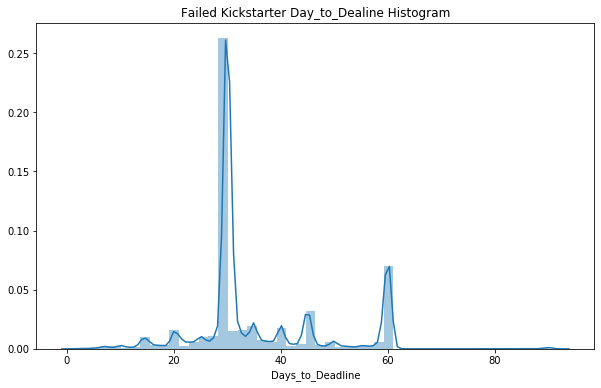

In [39]:
#creating a graph of days_to_deadline Fail
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(days_fail)
ax.set_title("Failed Kickstarter Day_to_Dealine Histogram")
ax.set_xlabel("Days_to_Deadline")
plt.show()

We see a massive spike in failed Kickstarter projects close to the 30 day mark, followed by a smaller spike at 60 days, with the graph going up and down in between the two spikes more so than before or after.

In [40]:
fail_days = days_to_deadline[days_to_deadline['successful']==0].index
days_success = pd.DataFrame(days_to_deadline)
days_success.drop(fail_days, inplace=True)
days_success.reset_index(drop=True, inplace=True)
days_success = days_success.drop(['successful'], axis=1)
days_success

,days_to_deadline
0,30
1,30
2,22
3,30
4,30
...,...
145654,35
145655,30
145656,25
145657,31


Next, we wanted to create a similar list, but only with successful projects.

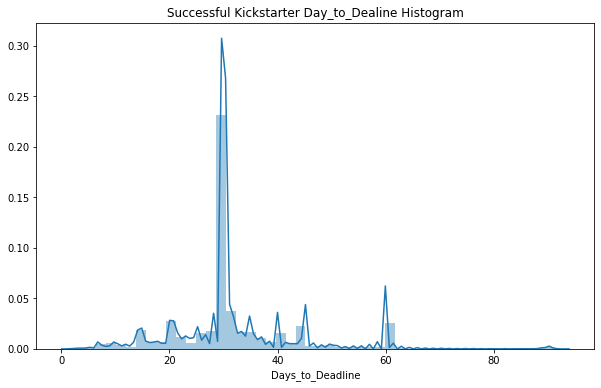

In [41]:
#creating a graph of days_to_deadline Success
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(days_success)
ax.set_title("Successful Kickstarter Day_to_Dealine Histogram")
ax.set_xlabel("Days_to_Deadline")
plt.show()

We see a very similar story with this graph of Successes. While the spikes aren't nearly as strong as they were in the failure graph, we see a very similar shape between the two graphs. Because it's hard to see any super significant difference between the two graphs, it's fair to say that Day_to_Deadline is not a significant factor correlating to success.

#### Location_Type Effect on Successful Kickstarters

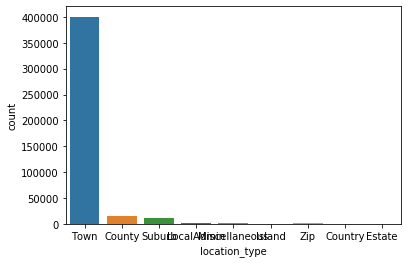

In [42]:
sns.countplot(x="location_type", data=new_kickstarter)
plt.show()

In [43]:
locate = pd.crosstab(new_kickstarter.location_type, columns='count')
locate

col_0,count
location_type,
Country,27
County,15104
Estate,9
Island,514
LocalAdmin,2452
Miscellaneous,1107
Suburb,10484
Town,400299
Zip,942


Our graph of successful Kickstarters based on their location type shows that a vast majority start in towns. However, this may just be a matter of where the site is most popular, and not necessarily a factor correlated directly to project success.

In [44]:
country = 0
county = 0
estate = 0
island = 0
local_admin = 0
miscellaneous = 0
suburb = 0
town = 0
zips = 0

for i in new_kickstarter.index:
    if new_kickstarter.loc[i,'location_type'] == 'Country' :
        if new_kickstarter.loc[i, 'successful'] == 1:
            country = country + 1
    elif new_kickstarter.loc[i,'location_type'] == 'County':
        if new_kickstarter.loc[i, 'successful'] == 1:
            county = county + 1
    elif new_kickstarter.loc[i,'location_type'] == 'Estate':
        if new_kickstarter.loc[i, 'successful'] == 1:
            estate = estate + 1
    elif new_kickstarter.loc[i,'location_type'] == 'Island':
        if new_kickstarter.loc[i, 'successful'] == 1:
            island = island + 1        
    elif new_kickstarter.loc[i,'location_type'] == 'LocalAdmin':
        if new_kickstarter.loc[i, 'successful'] == 1:
            local_admin = local_admin + 1
    elif new_kickstarter.loc[i,'location_type'] == 'Miscellaneous':
        if new_kickstarter.loc[i, 'successful'] == 1:
            miscellaneous = miscellaneous + 1
    elif new_kickstarter.loc[i,'location_type'] == 'Suburb':
        if new_kickstarter.loc[i, 'successful'] == 1:
            suburb = suburb + 1
    elif new_kickstarter.loc[i,'location_type'] == 'Town':
        if new_kickstarter.loc[i, 'successful'] == 1:
            town = town + 1
    elif new_kickstarter.loc[i,'location_type'] == 'Zip':
        if new_kickstarter.loc[i, 'successful'] == 1:
            zips = zips + 1

In [45]:
location_success = pd.DataFrame ([country, county, estate, island, local_admin, miscellaneous, suburb, town, zips])
location_name = pd.DataFrame (["Country", "County", "Estate", "Island", "LocalAdmin", "Miscellaneous", "Suburb", "Town", "Zip"])
locate.reset_index(drop=True, inplace=True)
location = pd.concat([location_name, locate, location_success], axis=1)
location.columns = ['location_type', 'total_count', 'success_count']
location['percent'] = location['success_count']/location['total_count']
location

,location_type,total_count,success_count,percent
0,Country,27,13,0.481481
1,County,15104,6401,0.423795
2,Estate,9,1,0.111111
3,Island,514,133,0.258755
4,LocalAdmin,2452,749,0.305465
5,Miscellaneous,1107,646,0.583559
6,Suburb,10484,2999,0.286055
7,Town,400299,134541,0.336101
8,Zip,942,176,0.186837


We counted the number of successful projects from each location_type, and calculated the percentage of successful projects.

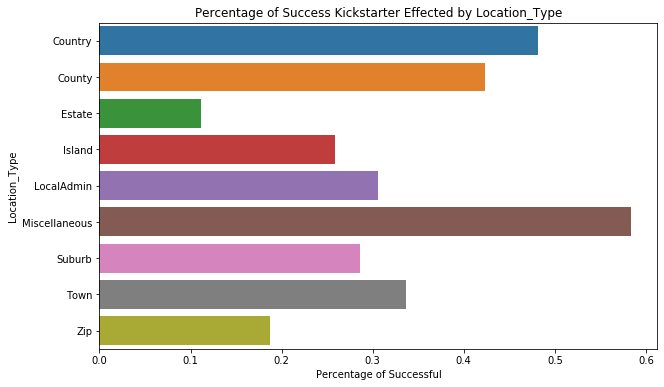

In [46]:
#creating a graph of location_type Success
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='percent', y = 'location_type', data=location)
ax.set_title("Percentage of Success Kickstarter Effected by Location_Type")
ax.set_ylabel("Location_Type")
ax.set_xlabel("Percentage of Successful")
plt.show()

When looking at the percentage of successful Kickstarters based on location type, we see a similar story to what we saw with the top 15 categories. Towns have the highest number of projects, as well as the highest number of successes, but their success percentage is relatively low. The most successful location type appears to be Miscellaneous, with a 58% success rate, despite having comparitively very few projects.

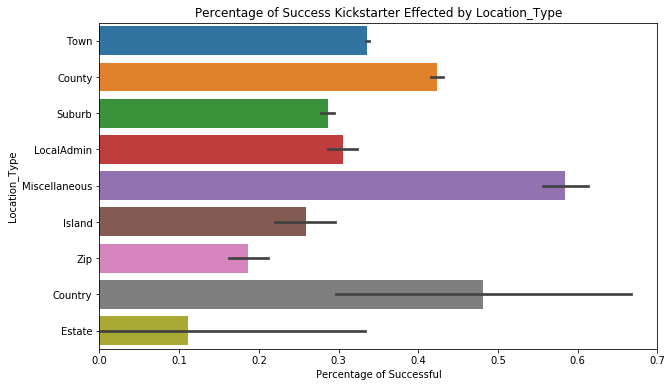

In [47]:
#creating a graph of days_to_deadline Success
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='successful', y = 'location_type', data=new_kickstarter)
ax.set_title("Percentage of Success Kickstarter Effected by Location_Type")
ax.set_ylabel("Location_Type")
ax.set_xlabel("Percentage of Successful")
plt.show()

When we bring in variances, we see yet another story from the results. Country and Miscellaneous have the highest success percentage, again despite having a lower number of projects. However, we also see that Country has a very wide variance, which makes it hard to make concrete conclusions based on this graph alone. We also see that Estate has one of the widest variances, as well as the lowest success rate.

### Conclusions

In our analysis of the dataset, we can see which variables correlate to success, and which ones don't have much of an effect.

We can see that the most popular categories are not necessarily the most successful; some of the less populated categories, such as Shorts, proved to be very successful, even if there were fewer Shorts than there were for games, apps, or other products. In fact, we saw that some of the more popular categories, particularly Apps, proved to be rather unsuccessful. This could be attributed to an oversaturation of products in those categories, with not too many popular projects, while having fewer projects could prove to be beneficial when we look at the numbers, as is the case with Shorts.

A big helping factor for successful projects was Staff Picks. These were projects that were hand picked and promoted by Kickstarter staff, giving them more exposure than they may have otherwise received. While not many projects were Staff Picks, those that were proved to have strong odds for success. 

We found that the number of days each project had before their deadline was not a crucial factor for project success. When we visualized successful and unsuccessful projects based on their project length, we saw very similar graph shapes between them, which indicates that Day_to_Deadline didn't have much of an effect on project success.

When looking at location types, we see that Towns have the most projects out of any location type. However, much like what we saw with the categories, having the most projects doesn't mean much in terms of success. We actually saw Miscellaneous and Country to be the most successful, despite having notably fewer projects. However, we see that Country also has a very wide variance compared to some other location types, which shows that it's not the most consistently successful. We do see, however, that the smallest variance belongs to Towns, the most popular location type.

# 4. Regression Analysis

In [48]:
# Import modules
import numpy as np
import statsmodels.api as sm
import seaborn as sb

# Configure inline mode
%matplotlib inline


## 4.1 All the Kickstarters

The first step that we need to take to perform a regression analysis is to find y and x. The variable y is the what we are looking for. In our case this is the success of the kickstarter. The variabel x are the variabels that we are looking at to see how they affect y, success.

In [49]:
y = new_kickstarter['successful'].dropna().tolist()

len(y)

430938

We picked the columns that we thought would have impact on the success of a kickstarter and not just a description about the individual kickstarters

In [50]:
x = new_kickstarter[['goal_USD', 'usd_pledged', 'staff_pick', 'year', 'days_to_deadline', 'blurb_length', 'location_type']]
x = pd.get_dummies(x, prefix='', prefix_sep='', columns=['year', 'location_type'])
x = sm.add_constant(x)
x = x.dropna()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430938 entries, 0 to 430937
Data columns (total 26 columns):
const               430938 non-null float64
goal_USD            430938 non-null float64
usd_pledged         430938 non-null float64
staff_pick          430938 non-null int64
days_to_deadline    430938 non-null int64
blurb_length        430938 non-null int64
2009                430938 non-null uint8
2010                430938 non-null uint8
2011                430938 non-null uint8
2012                430938 non-null uint8
2013                430938 non-null uint8
2014                430938 non-null uint8
2015                430938 non-null uint8
2016                430938 non-null uint8
2017                430938 non-null uint8
2018                430938 non-null uint8
2019                430938 non-null uint8
Country             430938 non-null uint8
County              430938 non-null uint8
Estate              430938 non-null uint8
Island              430938 non-null uint8
L

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Then we fit a full linear model with the data from above

In [51]:
# Fit a full model
mod_full = sm.OLS(y,x.astype(float)).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3681.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:09:26   Log-Likelihood:            -2.5022e+05
No. Observations:              430938   AIC:                         5.005e+05
Df Residuals:                  430914   BIC:                         5.008e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5155      0.016     32.469      0.000       0.484       0.547
goal_USD         -6.745e-09   6.54e-10    -10.312      0.000   -8.03e-09   -5.46e-09
usd_pledged       2.908e-07   6.36e-09     45.762      0.000    2.78e-07    3.03e-07
staff_pick           0.2992      0.002    137.080      0.000       0.295       0.303
days_to_deadline    -0.0058   5.42e-05   -106.131      0.000      -0.006      -0.006
blurb_length        -0.0010      0.000     -7.408      0.000      -0.001      -0.001
2009                 0.3313      0.014     24.523      0.000       0.305       0.358
2010                 0.3104      0.005     58.538      0.000       0.300       0.321
2011                 0.2767      0.004     73.815      0.000       0.269       0.284
2012                 0.1687      0.003     52.734      0.000       0.162       0.175
2013                 0.1872      0.003     58.994      0.000       0.181       0.193
2014                -0.0230      0.003     -8.296      0.000      -0.028      -0.018
2015                -0.0655      0.003    -24.714      0.000      -0.071      -0.060
2016                -0.1935      0.002    -77.632      0.000      -0.198      -0.189
2017                -0.1623      0.003    -64.747      0.000      -0.167      -0.157
2018                -0.1291      0.003    -50.418      0.000      -0.134      -0.124
2019                -0.1856      0.004    -52.738      0.000      -0.192      -0.179
Country              0.2825      0.076      3.701      0.000       0.133       0.432
County               0.1134      0.017      6.542      0.000       0.079       0.147
Estate              -0.0875      0.130     -0.674      0.501      -0.342       0.167
Island              -0.0094      0.024     -0.388      0.698      -0.057       0.038
LocalAdmin           0.0828      0.019      4.413      0.000       0.046       0.120
Miscellaneous        0.0255      0.021      1.203      0.229      -0.016       0.067
Suburb               0.0403      0.017      2.308      0.021       0.006       0.075
Town                 0.0720      0.017      4.220      0.000       0.039       0.105
Zip                 -0.0043      0.021     -0.201      0.841      -0.046       0.037
==============================================================================
Omnibus:                    56991.913   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36842.116
Skew:                           0.597   Prob(JB):                         0.00
Kurtosis:                       2.210   Cond. No.                     7.81e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.19e-17. 

### Findings

- Staff_pick has a positive effect on the success of a Kickstarter. Increasing the staff_pick by 1 would increase the change of success but 0.2857. This positive effect is statistically significant since the p-value is less than 0.01.

- The coefficient of goal_USD is estimated to be -6.005e-09. This means that the success of a Kickstarter is less for how much their goal is in USD. Since there is a p-value of less than 0.01 then goal_USD has a statistically significant negative effect on success.

- USD_Pledged has a positive effect on the success of a Kickstarter. Increasing the usd_pledged by 1 would increase the change of success but 2.448e-07. This positive effect is statistically significant since the p-value is less than 0.01.

- For all of the dummy variables for the original variable year, they are all statistically significant but there is a difference between there being a positive or negative effect on success. In earlier years (2009-2013) and 2019, there is a positive effect on success. In the middle years (2014-2018) there was a negative effect on success. We can see that there was more success in the earlier years and last year than all of the other years. This could be due to Kickstarter falling off a bit in 2014 and making a resurgence in 2019.

- There are a few different predictors that do not have statistically significant effects on success (p-value > 0.01) - Estate, Island, Miscellaneous, Suburb, and Zip. All of these predictors are dummy variables created out of the original variable location_type.  


## 4.2 Top 15 Kickstarter Categories

Since we started looking at the top 15 categories above to see how they affective they are at being successful, we decided to do a regression analysis also on those top 15 categories. This will give use a more clear look at just the top 15 categories and we can also see the difference and similarities between all the kickstarters and only the kickstarters in the top 15 categories.

First, we have to make a data frame of with all of the rows and columns of the top 15 categories.

In [52]:
top_category_df = new_kickstarter.loc[new_kickstarter['category_name'].isin(["Product Design", "Tabletop Games", 'Video Games', 
                                                                             'Apparel', 'Apps', 'Fiction', 'Documentary', 'Nonfiction', 
                                                                             'Shorts', "Children's Books", 'Web','Rock', 'Webseries', 'Accessories', 'Indie Rock'])]

In [53]:
top_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168379 entries, 18241 to 430934
Data columns (total 31 columns):
Unnamed: 0                   168379 non-null int64
id                           168379 non-null int64
backers_count                168379 non-null int64
blurb                        168379 non-null object
currency                     168379 non-null object
goal                         168379 non-null float64
launched_at                  168379 non-null datetime64[ns]
deadline                     168379 non-null datetime64[ns]
usd_pledged                  168379 non-null float64
slug                         168379 non-null object
spotlight                    168379 non-null int64
staff_pick                   168379 non-null int64
static_usd_rate              168379 non-null float64
year                         168379 non-null int64
month                        168379 non-null int64
day                          168379 non-null int64
hour                         168379 non-nu

Then, we find y and x for the new data frame, like above. We also used the same y and x to keep the simialrities and difference easy to find and so that the model was the same. 

In [54]:
top_y = top_category_df['successful'].dropna().tolist()
len(top_y)

168379

In [55]:
top_x = top_category_df[['goal_USD', 'usd_pledged', 'staff_pick', 'year', 'days_to_deadline', 'blurb_length', 'location_type']]
top_x = pd.get_dummies(top_x, prefix='', prefix_sep='', columns=['year', 'location_type'])
top_x = sm.add_constant(top_x)
top_x = top_x.dropna()
top_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168379 entries, 18241 to 430934
Data columns (total 26 columns):
const               168379 non-null float64
goal_USD            168379 non-null float64
usd_pledged         168379 non-null float64
staff_pick          168379 non-null int64
days_to_deadline    168379 non-null int64
blurb_length        168379 non-null int64
2009                168379 non-null uint8
2010                168379 non-null uint8
2011                168379 non-null uint8
2012                168379 non-null uint8
2013                168379 non-null uint8
2014                168379 non-null uint8
2015                168379 non-null uint8
2016                168379 non-null uint8
2017                168379 non-null uint8
2018                168379 non-null uint8
2019                168379 non-null uint8
Country             168379 non-null uint8
County              168379 non-null uint8
Estate              168379 non-null uint8
Island              168379 non-null uin

Finally, we do a full linear model of the top 15 categories.

In [56]:
# Fit a full model
mod_full = sm.OLS(top_y,top_x.astype(float)).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:09:26   Log-Likelihood:            -1.0054e+05
No. Observations:              168379   AIC:                         2.011e+05
Df Residuals:                  168355   BIC:                         2.014e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5267      0.028     18.893      0.000       0.472       0.581
goal_USD         -1.124e-08   1.77e-09     -6.342      0.000   -1.47e-08   -7.76e-09
usd_pledged       2.243e-07   7.66e-09     29.271      0.000    2.09e-07    2.39e-07
staff_pick           0.2723      0.004     75.187      0.000       0.265       0.279
days_to_deadline    -0.0059   9.17e-05    -64.563      0.000      -0.006      -0.006
blurb_length        -0.0014      0.000     -6.297      0.000      -0.002      -0.001
2009                 0.3496      0.022     15.814      0.000       0.306       0.393
2010                 0.3097      0.009     35.188      0.000       0.292       0.327
2011                 0.2698      0.006     43.920      0.000       0.258       0.282
2012                 0.1368      0.005     26.836      0.000       0.127       0.147
2013                 0.1779      0.005     35.461      0.000       0.168       0.188
2014                 0.0306      0.005      6.523      0.000       0.021       0.040
2015                -0.0265      0.005     -5.819      0.000      -0.035      -0.018
2016                -0.2108      0.004    -50.883      0.000      -0.219      -0.203
2017                -0.1821      0.004    -43.563      0.000      -0.190      -0.174
2018                -0.1323      0.004    -30.726      0.000      -0.141      -0.124
2019                -0.1959      0.006    -33.715      0.000      -0.207      -0.185
Country              0.2028      0.134      1.510      0.131      -0.061       0.466
County               0.1446      0.030      4.749      0.000       0.085       0.204
Estate              -0.1626      0.229     -0.711      0.477      -0.611       0.286
Island               0.0193      0.040      0.481      0.631      -0.059       0.098
LocalAdmin           0.0891      0.033      2.717      0.007       0.025       0.153
Miscellaneous        0.0554      0.036      1.522      0.128      -0.016       0.127
Suburb               0.0579      0.031      1.885      0.059      -0.002       0.118
Town                 0.0975      0.030      3.250      0.001       0.039       0.156
Zip                  0.0228      0.038      0.603      0.547      -0.051       0.097
==============================================================================
Omnibus:                    43473.424   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13782.880
Skew:                           0.495   Prob(JB):                         0.00
Kurtosis:                       2.007   Cond. No.                     8.81e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.95e-18. 

### Similarities

- The staff_pick still has a positive effect on success of a Kickstarter but, it has a higher coefficient within the top 15 categories. 

- The usd_pledged is still a positive effect on the success of a Kickstarter. It is just a little bit smaller of a coefficient though. 


### Differences

- There is a major difference in the negative effect goal_USD has on success. In the data of all the Kickstarters, it has a coefficient of -6.005e-09 and in this data set, there is only -1.079e-08. This shows that there is less the negative effect of goal_USD in the top 15 categories then the whole dataset.

- The coefficients for the year dummy variables are showing a different trend in the top 15 categories. There are still positive coefficients in the early years (2009-2013) and the year 2018. The negative coefficients are in the years (2014-2017) and 2019. There is a slight difference in the years between the whole data set and the top 15 categories in the years 2018 and 2019. The year 2018 also now has not statistically significant since the p-value is 0.487 which is greater than 0.01. Even though there is a change in 2018, with the top 15 categories there is no sign of the year to the success of Kickstarters.

- There are more predictors that do not statistically significant effects on success (p-value > 0.01) - 2018, Country, Estate, Island, LocalAdmin, Miscellaneous, Suburb, and Zip. There is more location_types that are not statistically significant in the top 15 categories than in the whole data set.


# 5. Predictive Analysis

## 5.1.1 All the Kickstarters - Logistic Regression

In [57]:
import itertools

In [58]:
new_kickstarter['successful'].value_counts()

0    285279
1    145659
Name: successful, dtype: int64

We picked the columns that we thought would have impact on the success of a kickstarter and not just a description about the individual kickstarters

In [59]:
x = new_kickstarter[['goal_USD', 'usd_pledged', 'staff_pick', 'year', 'days_to_deadline', 'blurb_length', 'location_type']]
x = pd.get_dummies(x, prefix='', prefix_sep='', columns=['year', 'location_type'])
x = sm.add_constant(x)
x = x.dropna()
x.head()

,const,goal_USD,usd_pledged,staff_pick,days_to_deadline,blurb_length,2009,2010,2011,2012,...,2019,Country,County,Estate,Island,LocalAdmin,Miscellaneous,Suburb,Town,Zip
0,1.0,2000.0000,25.00000,0,42,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,10.0000,6.00000,0,10,21,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,900.0000,0.00000,0,30,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,900.0000,0.00000,0,20,17,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,22801.6545,1.52011,0,30,26,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
y = new_kickstarter['successful']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: successful, dtype: uint8

In [61]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_x,test_x = train_test_split(y, x,
                                                 test_size=0.2,
                                                 stratify=y,
                                                 random_state=123)

In [62]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression with Class Weight

In [63]:
# Assign class_weight as 10 for class 1 (class 0 will have 1 as class weight by default)
logit1 = LogisticRegression(class_weight={1:10},solver='liblinear')
logit1.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight={1: 10}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pred_y_logit1 = logit1.predict(test_x)

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.plot()

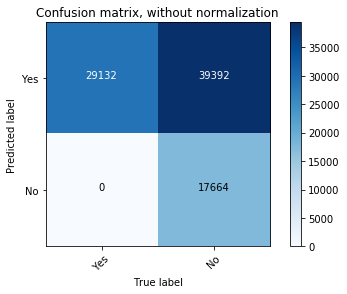

In [66]:
from sklearn import metrics

# Compute confusion matrix
cnf_matrix_logit1 = metrics.confusion_matrix(pred_y_logit1, test_y, labels=[1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_logit1, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [67]:
print(metrics.classification_report(test_y, pred_y_logit1))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47     57056
           1       0.43      1.00      0.60     29132

    accuracy                           0.54     86188
   macro avg       0.71      0.65      0.53     86188
weighted avg       0.81      0.54      0.51     86188



Overall accuracy seems not good, or, as the averaged F-score suggests, even a bit worse.

The model has a very high precision in classifying unsuccessful kickstarter project ("0",100%). However, the 31% recall suggests that it does miss out most of the unsuccessful kickstarter projects in the whole test sample.

However, the model is almost not able to identify successful kiskstarter project ("1"). It only captures about 43% of the potential candidates and includes many false positives. In addition, the proportion of true positive classifications that are true positive is high.

Overall, logistic regression model without class weight is not a very good model to predict sucess of kickstarter projects.

## 5.1.2 All the Kickstarters - k-Nearest-Neighbors (k-NN)

In [68]:
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
const,430938.0,1.000000,0.000000e+00,1.00,1.0,1.0,1.000000,1.000000e+00
goal_USD,430938.0,39712.464829,1.008321e+06,0.01,2000.0,5000.0,15000.000000,1.523501e+08
usd_pledged,430938.0,12103.239324,1.047045e+05,0.00,55.0,922.0,5146.986864,2.033899e+07
staff_pick,430938.0,0.104744,3.062231e-01,0.00,0.0,0.0,0.000000,1.000000e+00
days_to_deadline,430938.0,34.295223,1.238081e+01,1.00,30.0,30.0,38.000000,9.300000e+01
blurb_length,430938.0,18.938532,5.060098e+00,1.00,16.0,20.0,22.000000,4.100000e+01
2009,430938.0,0.002174,4.657901e-02,0.00,0.0,0.0,0.000000,1.000000e+00
2010,430938.0,0.016155,1.260734e-01,0.00,0.0,0.0,0.000000,1.000000e+00
2011,430938.0,0.037511,1.900110e-01,0.00,0.0,0.0,0.000000,1.000000e+00
2012,430938.0,0.061385,2.400349e-01,0.00,0.0,0.0,0.000000,1.000000e+00


In [69]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_x)

We normalize the data. Because the k-NN needs to calculate distance between observations, it's better to normalize data as we have variables measured in different scales. In this case, we normalize the data into the scale range [0, 1].


In [70]:
train_x_scale = scaler.transform(train_x)
train_x_scale = pd.DataFrame(train_x_scale)
train_x_scale.columns = train_x.columns

train_x_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
const,344750.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
goal_USD,344750.0,0.000260,0.006700,0.0,0.000013,0.000033,0.000098,1.0
usd_pledged,344750.0,0.000598,0.005215,0.0,0.000003,0.000046,0.000253,1.0
staff_pick,344750.0,0.104673,0.306132,0.0,0.000000,0.000000,0.000000,1.0
days_to_deadline,344750.0,0.361932,0.134664,0.0,0.315217,0.315217,0.402174,1.0
blurb_length,344750.0,0.448490,0.126466,0.0,0.375000,0.475000,0.525000,1.0
2009,344750.0,0.002175,0.046591,0.0,0.000000,0.000000,0.000000,1.0
2010,344750.0,0.016287,0.126578,0.0,0.000000,0.000000,0.000000,1.0
2011,344750.0,0.037894,0.190940,0.0,0.000000,0.000000,0.000000,1.0
2012,344750.0,0.061839,0.240863,0.0,0.000000,0.000000,0.000000,1.0


We transform training x.

In [134]:
# Transform test x
test_x_scale = scaler.transform(test_x)
test_x_scale = pd.DataFrame(test_x_scale)
test_x_scale.columns = test_x.columns

test_x_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
const,86188.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
goal_USD,86188.0,0.000402,0.009570,0.0,0.000020,0.000050,0.000150,1.000000
usd_pledged,86188.0,0.000895,0.007457,0.0,0.000004,0.000068,0.000386,1.000000
staff_pick,86188.0,0.105026,0.306589,0.0,0.000000,0.000000,0.000000,1.000000
days_to_deadline,86188.0,0.361796,0.134213,0.0,0.315217,0.315217,0.402174,0.989130
blurb_length,86188.0,0.527479,0.148997,0.0,0.441176,0.558824,0.617647,0.941176
2009,86188.0,0.002170,0.046529,0.0,0.000000,0.000000,0.000000,1.000000
2010,86188.0,0.015629,0.124034,0.0,0.000000,0.000000,0.000000,1.000000
2011,86188.0,0.035979,0.186240,0.0,0.000000,0.000000,0.000000,1.000000
2012,86188.0,0.059567,0.236685,0.0,0.000000,0.000000,0.000000,1.000000


We transform test x.

In [135]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [136]:
knn5.fit(train_x_scale, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

We train a k-NN Classifier.

Now let's use the test dataset to assess the performance of the trained model.

In [74]:
pred_y_knn5 = knn5.predict(test_x_scale)

In [75]:
from sklearn import metrics

# Print confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print(cm)

[[49414  7642]
 [ 7537 21595]]


In [76]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

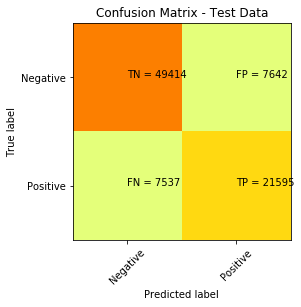

In [77]:
print_cm(cm)

In [78]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_knn5)

0.8238849955910336

In [79]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_knn5)

0.8036712394216389

In [80]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_knn5)

0.6068072788594722

In [81]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_knn5))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     57056
           1       0.74      0.74      0.74     29132

    accuracy                           0.82     86188
   macro avg       0.80      0.80      0.80     86188
weighted avg       0.82      0.82      0.82     86188



By looking at the classification report, KNN model for K = 5 has relative high accuracy, precision, recall, and f1 score compared to the logistic regression model. Therefore, KNN model for K = 5 is a good predicting model to predict the success of kickstarter projects based on the selected features. 

Tune the k-NN Classifier

In [141]:
for k in range(5, 10):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_x_scale, train_y)
    pred_y = knn.predict(test_x_scale)
    print("AUC is ", round(metrics.roc_auc_score(test_y, pred_y)*100,2),"% for k =",k)

AUC is  76.55 % for k = 6
AUC is  78.54 % for k = 7
AUC is  76.49 % for k = 8
AUC is  78.15 % for k = 9
AUC is  76.28 % for k = 10


Due to the performance of the PC, we only choose k from 6 to 10 to tune the KNN classifier based on the AUC score. As we can see, k = 5 has the highest AUC score. Therefore, we choose k = 5 for KNN model to predict the success of the kickstarter project. 

## 5.1.3 All the Kickstarters - Gaussian Naive Bayes Classifier

In [82]:
# Gaussian Naive Bayes (GaussianNB) for classification. The likelihood of features is assumed to be Gaussian.
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

In [83]:
gauss_nb.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

Now, let's use the test dataset to assess the performance of the trained model.

In [84]:
pred_y_gnb = gauss_nb.predict(test_x)

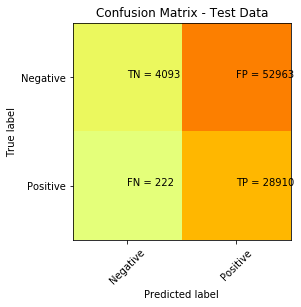

In [85]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_gnb))

In [86]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_gnb)

0.3829187357868845

In [87]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_gnb)

0.5320580267383328

In [88]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_gnb)

0.04443182105792254

In [89]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.95      0.07      0.13     57056
           1       0.35      0.99      0.52     29132

    accuracy                           0.38     86188
   macro avg       0.65      0.53      0.33     86188
weighted avg       0.75      0.38      0.26     86188



## 5.1.4 All the Kickstarters - Bernoulli Naive Bayes Classifier

In [90]:
# Naive Bayes classifier for multivariate Bernoulli models
bernou_nb = naive_bayes.BernoulliNB()

In [91]:
bernou_nb.fit(train_x, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [92]:
pred_y_bnb = bernou_nb.predict(test_x)

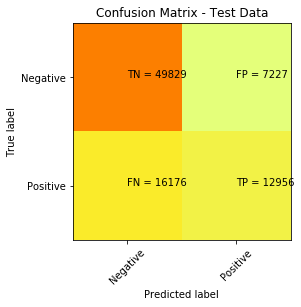

In [93]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_bnb))

In [94]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_bnb)

0.7284656796769852

In [95]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_bnb)

0.6590346409681532

In [96]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_bnb)

0.3439222746284254

In [97]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_bnb))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     57056
           1       0.64      0.44      0.53     29132

    accuracy                           0.73     86188
   macro avg       0.70      0.66      0.67     86188
weighted avg       0.72      0.73      0.71     86188



Let's compare the Two Naive Bayes Models

In [98]:
acc = [metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_bnb)]

pre = [metrics.precision_score(test_y, pred_y_gnb),
       metrics.precision_score(test_y, pred_y_bnb)]

rec = [metrics.recall_score(test_y, pred_y_gnb),
       metrics.recall_score(test_y, pred_y_bnb)]

f1  = [metrics.f1_score(test_y, pred_y_gnb),
       metrics.f1_score(test_y, pred_y_bnb)]

In [99]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['Gaussian Naive Bayes','Bernoulli Naive Bayes'])

,Accuracy,Precision,Recall,F1 Score
Gaussian Naive Bayes,0.382919,0.353108,0.992380,0.520877
Bernoulli Naive Bayes,0.728466,0.641926,0.444734,0.525439


Compared with the Gaussian naive Bayes model, the Bernoulli naive Bayes model has a higher accuracy, F1 score, and precision. The Gaussian naive Bayes model has a higher recall.

Moreover, both Navie Bayes models have relative low accuracy, precision, recall, and F1 score compared with KNN model. We believe this may be due to the limitation of Navie Bayes assumption that there are strong indepences among each feature. However, the location types are stongly related to each other. 



## 5.1.5 All the Kickstarters - Decision Tree 

In [144]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
pred_y_dt = dt.predict(test_x)

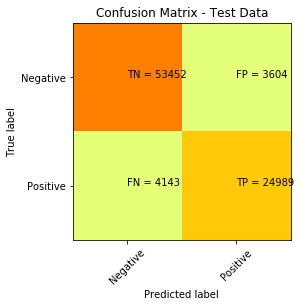

In [147]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_dt))

In [148]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_dt)

0.9101150972293127

In [150]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_dt)

0.8973096204954584

In [151]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_dt)

0.7982332948014935

In [152]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     57056
           1       0.87      0.86      0.87     29132

    accuracy                           0.91     86188
   macro avg       0.90      0.90      0.90     86188
weighted avg       0.91      0.91      0.91     86188



By looking at the classification report, decision tree model has relative high accuracy, precision, recall, and f1 score compared to all the previous models above. Therefore, decision tree model is a good predicting model to predict the success of kickstarter projects based on the selected features. 

## 5.1.6 All the Kickstarters - Random Forests Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
# Train an RF classifier
rf = RandomForestClassifier(n_estimators=5, max_features=10, random_state=123)

In [156]:
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [157]:
# Show feature importance
rf.feature_importances_

array([0.00000000e+00, 2.50588668e-01, 5.52637964e-01, 3.07904121e-02,
       3.67247163e-02, 3.55536059e-02, 3.66286996e-04, 3.02548148e-03,
       8.59250929e-03, 8.97969453e-03, 1.36460794e-02, 7.93884636e-03,
       9.70462942e-03, 8.47570832e-03, 1.05433411e-02, 8.03289144e-03,
       9.97347334e-03, 2.83051257e-06, 1.23945432e-03, 2.13966941e-07,
       5.88260077e-05, 4.40797524e-04, 6.55013314e-05, 7.75880095e-04,
       1.67536294e-03, 1.66826054e-04])

In [158]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_x.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
usd_pledged,5.526380e-01
goal_USD,2.505887e-01
days_to_deadline,3.672472e-02
blurb_length,3.555361e-02
staff_pick,3.079041e-02
2013,1.364608e-02
2017,1.054334e-02
2019,9.973473e-03
2015,9.704629e-03
2012,8.979695e-03


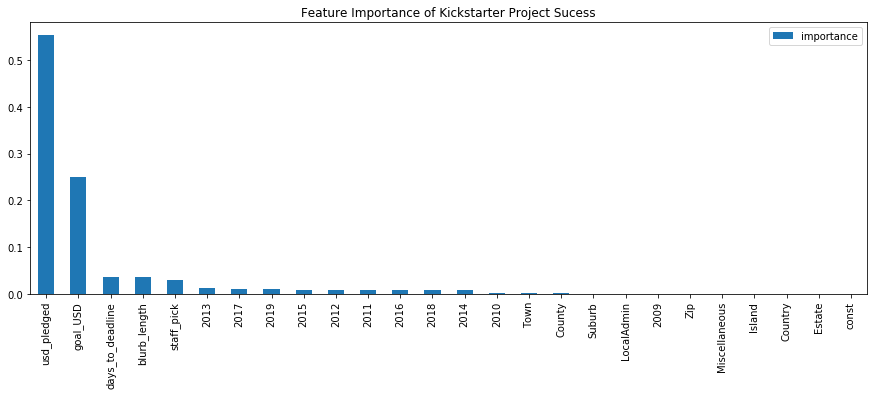

In [159]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Kickstarter Project Sucess')

In [160]:
# Predict on test set
pred_y_rf = rf.predict(test_x)

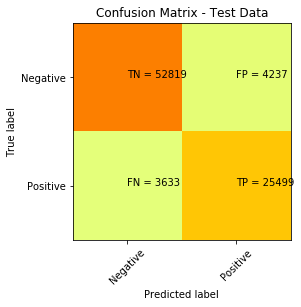

In [161]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf))

In [162]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf)

0.9086879844061818

In [163]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_rf)

0.9005156997980608

In [164]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_rf)

0.7969878326226176

In [165]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     57056
           1       0.87      0.86      0.87     29132

    accuracy                           0.91     86188
   macro avg       0.90      0.90      0.90     86188
weighted avg       0.91      0.91      0.91     86188



By looking at the classification report, random forests model has relatively higher accuracy, precision, recall, and f1 score compared to knn and navie bayes models. Instead, it has relativly same results as decision tree model. Therefore, both decision tree model and random forests model are good predicting models to predict the success of kickstarter projects based on the selected features. 

## 5.2.1 Top 15 Kickstarter Categories-k-Nearest-Neighbors (k-NN)

In [100]:
top_category_df = new_kickstarter.loc[new_kickstarter['category_name'].isin(["Product Design", "Tabletop Games", 'Video Games', 'Apparel', 'Apps', 'Fiction', 'Documentary', 'Nonfiction', 'Shorts', "Children's Books", 'Web','Rock', 'Webseries', 'Accessories', 'Indie Rock'])]

In [101]:
x1 = top_category_df[['goal_USD', 'usd_pledged', 'staff_pick', 'year', 'days_to_deadline', 
                      'blurb_length', 'location_type']]
x1 = pd.get_dummies(x1, prefix='', prefix_sep='', columns=['year', 'location_type'])
x1 = sm.add_constant(x1)
x1 = x1.dropna()
x1.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,goal_USD,usd_pledged,staff_pick,days_to_deadline,blurb_length,2009,2010,2011,2012,...,2019,Country,County,Estate,Island,LocalAdmin,Miscellaneous,Suburb,Town,Zip
18241,1.0,2500.000000,4403.500000,0,22,18,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18242,1.0,1000.000000,4728.000000,0,10,21,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18243,1.0,207.210425,831.328225,0,31,22,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18244,1.0,20000.000000,21547.000000,0,30,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
18245,1.0,20000.000000,24493.000000,0,40,22,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
y1 = top_category_df['successful']
y1.head()

18241    1
18242    1
18243    1
18244    1
18245    1
Name: successful, dtype: uint8

In [103]:
# 20-80% simple split
# To make the result reproducible, set the random_state
train_y1,test_y1,train_x1,test_x1 = train_test_split(y1, x1,
                                                 test_size=0.2,
                                                 random_state=123)

In [104]:
# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_x1)

In [105]:
# Transform training X
train_x1_scale = scaler.transform(train_x1)
train_x1_scale = pd.DataFrame(train_x1_scale)
train_x1_scale.columns = train_x1.columns

train_x1_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
const,134703.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
goal_USD,134703.0,0.000248,0.005416,0.0,0.000020,0.000060,0.000152,1.0
usd_pledged,134703.0,0.001301,0.009726,0.0,0.000007,0.000101,0.000548,1.0
staff_pick,134703.0,0.100406,0.300542,0.0,0.000000,0.000000,0.000000,1.0
days_to_deadline,134703.0,0.359603,0.129649,0.0,0.315217,0.315217,0.380435,1.0
blurb_length,134703.0,0.529192,0.144961,0.0,0.441176,0.558824,0.617647,1.0
2009,134703.0,0.002175,0.046588,0.0,0.000000,0.000000,0.000000,1.0
2010,134703.0,0.015746,0.124491,0.0,0.000000,0.000000,0.000000,1.0
2011,134703.0,0.038062,0.191346,0.0,0.000000,0.000000,0.000000,1.0
2012,134703.0,0.071342,0.257396,0.0,0.000000,0.000000,0.000000,1.0


In [106]:
# Transform test x1
test_x1_scale = scaler.transform(test_x1)
test_x1_scale = pd.DataFrame(test_x1_scale)
test_x1_scale.columns = test_x1.columns

test_x1_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
const,33676.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
goal_USD,33676.0,0.000292,0.008107,1.130338e-09,0.000020,0.000060,0.000153,1.000000
usd_pledged,33676.0,0.001380,0.013772,0.000000e+00,0.000006,0.000101,0.000559,1.530948
staff_pick,33676.0,0.100606,0.300810,0.000000e+00,0.000000,0.000000,0.000000,1.000000
days_to_deadline,33676.0,0.360006,0.130341,0.000000e+00,0.315217,0.315217,0.391304,0.989130
blurb_length,33676.0,0.528579,0.146731,0.000000e+00,0.441176,0.558824,0.617647,0.970588
2009,33676.0,0.002168,0.046509,0.000000e+00,0.000000,0.000000,0.000000,1.000000
2010,33676.0,0.015382,0.123068,0.000000e+00,0.000000,0.000000,0.000000,1.000000
2011,33676.0,0.038692,0.192863,0.000000e+00,0.000000,0.000000,0.000000,1.000000
2012,33676.0,0.068565,0.252717,0.000000e+00,0.000000,0.000000,0.000000,1.000000


Now let's train a k-NN Classifier

In [107]:
# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [108]:
knn5.fit(train_x1_scale, train_y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
pred_y1_knn5 = knn5.predict(test_x1_scale)

In [110]:
# Print confusion matrix
cm = metrics.confusion_matrix(test_y1, pred_y1_knn5)
print(cm)

[[18153  3316]
 [ 3738  8469]]


In [111]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

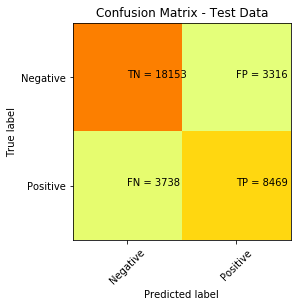

In [112]:
print_cm(cm)

In [113]:
# Calculate classification accuracy
metrics.accuracy_score(test_y1, pred_y1_knn5)

0.7905333174961396

In [114]:
# Calculate AUC
metrics.roc_auc_score(test_y1, pred_y1_knn5)

0.7696634975042345

In [115]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y1, pred_y1_knn5)

0.5433789938890035

In [116]:
# Print classification report
print(metrics.classification_report(test_y1, pred_y1_knn5))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     21469
           1       0.72      0.69      0.71     12207

    accuracy                           0.79     33676
   macro avg       0.77      0.77      0.77     33676
weighted avg       0.79      0.79      0.79     33676



## 5.2.2 Top 15 Kickstarter Categories-Gaussian Naive Bayes Classifier

In [117]:
gauss_nb.fit(train_x1, train_y1)


GaussianNB(priors=None, var_smoothing=1e-09)

Now, let's use the test dataset to assess the performance of the trained model.

In [118]:
pred_y1_gnb = gauss_nb.predict(test_x1)

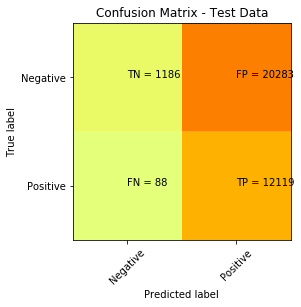

In [119]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y1, pred_y1_gnb))

In [120]:
# Calculate classification accuracy
metrics.accuracy_score(test_y1, pred_y1_gnb)

0.3950884903195154

In [121]:
# Calculate AUC
metrics.roc_auc_score(test_y1, pred_y1_gnb)

0.5240167320683295

In [122]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y1, pred_y1_gnb)

0.035400456892649035

In [123]:
# Print classification report
print(metrics.classification_report(test_y1, pred_y1_gnb))

              precision    recall  f1-score   support

           0       0.93      0.06      0.10     21469
           1       0.37      0.99      0.54     12207

    accuracy                           0.40     33676
   macro avg       0.65      0.52      0.32     33676
weighted avg       0.73      0.40      0.26     33676



## 5.2.3 Top 15 Kickstarter Categories-Bernoulli Naive Bayes Classifier

In [124]:
bernou_nb.fit(train_x1, train_y1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [125]:
pred_y1_bnb = bernou_nb.predict(test_x1)

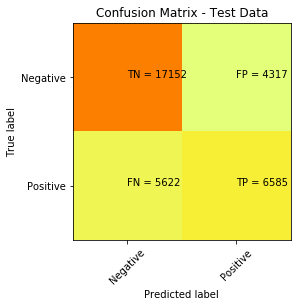

In [126]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y1, pred_y1_bnb))

In [127]:
# Calculate classification accuracy
metrics.accuracy_score(test_y1, pred_y1_bnb)

0.7048639980995368

In [128]:
# Calculate AUC
metrics.roc_auc_score(test_y1, pred_y1_bnb)

0.6691819765480325

In [129]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y1, pred_y1_bnb)

0.3463509010406446

In [130]:
# Print classification report
print(metrics.classification_report(test_y1, pred_y1_bnb))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78     21469
           1       0.60      0.54      0.57     12207

    accuracy                           0.70     33676
   macro avg       0.68      0.67      0.67     33676
weighted avg       0.70      0.70      0.70     33676



Compare the Two Naive Bayes Models

In [131]:
acc = [metrics.accuracy_score(test_y1, pred_y1_gnb),
       metrics.accuracy_score(test_y1, pred_y1_bnb)]

pre = [metrics.precision_score(test_y1, pred_y1_gnb),
       metrics.precision_score(test_y1, pred_y1_bnb)]

rec = [metrics.recall_score(test_y1, pred_y1_gnb),
       metrics.recall_score(test_y1, pred_y1_bnb)]

f1  = [metrics.f1_score(test_y1, pred_y1_gnb),
       metrics.f1_score(test_y1, pred_y1_bnb)]

In [132]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['Gaussian Naive Bayes','Bernoulli Naive Bayes'])

,Accuracy,Precision,Recall,F1 Score
Gaussian Naive Bayes,0.395088,0.374020,0.992791,0.543343
Bernoulli Naive Bayes,0.704864,0.604018,0.539445,0.569908


Compared with the Gaussian naive Bayes model, the Bernoulli naive Bayes model has a higher accuracy, F1 score, and precision. The Gaussian naive Bayes model has a higher recall.

# 6. Summary of Key Findings

## Regression Analysis

Across all of the Kickstarter projects from our dataset, we see that the most significant factors correlating to project success are staff_pick, Country and usd_pledged. We also see varying significance in the years these projects take place (2009-2013 were good years for Kickstarter success, followed by negative correlation from 2014 onward, although 2018 showed a stronger positive effect than the years before it). We can see that 2009 had the strongest positive correlation, and 2016 had the strongest negative correlation. 

When we perform our regression analysis on the top 15 categories, we see a slightly different story. While staff_pick and usd_pledged are still have significant effects within the top 15 categories, they boths have slightly smaller coefficients. 

While both datasets show that goal_USD has a negative effect on success, it has a lesser effect in the top 15 categories by a significant amount (-6.005e-09 vs -1.079e-08 in the top 15). We also see a difference in the effect of each year from our dataset. While we still see positive effects from 2009-2013 and 2018, and negative effects from 2014-2017 and 2019, the year is not nearly as significant for the top 15 categories. 

## Predictive Analysis

While our logistic regression model proved to be very precise in classifying failed Kickstarters, it proved to miss most of the unsuccessful projects in our sample. For successful projects, the model had very low precision and included many false positives. With this in mind, we determined that logistic unweighted logistic regression is not a good pick for predicting success on Kickstarter.

### All Kickstarters

After normalizing our data and experimenting with various regression models, we concluded that our Decision Tree and Random Forests Classifier proved to be the best models for predicting Kickstarter success.

### Top 15 Categories

For the top 15 categories, we found that the Bernoulli Naive Bayes model had high prediction accuracy and precision, as well as a higher F1 score than the Gaussian Naive Bayes model. However, the Gaussian Naive Bayes model had a higher recall despite its lower rates of accuracy and precision.